In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'

# Patient CJ

In [ ]:
cj_ntwrk = np.load('datasets/id002_cj/CJ_network.npz')
cj_sim_data = np.load('datasets/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')

#### Structural Connectivity

In [ ]:
plt.figure(figsize=(10,10))
num_nodes = cj_ntwrk['SC'].shape[0]
log_norm = colors.LogNorm(vmin=1e-7, vmax=cj_ntwrk['SC'].max())
plt.imshow(cj_ntwrk['SC'], norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
plt.xticks(xticks, xticks+1, fontsize=15)
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Node',fontsize=20)
cb = plt.colorbar(fraction=0.035)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(f'{res_root_dir}/figures/CJ/SC.png')


#### Gain Matrix

In [ ]:
plt.figure(figsize=(6,10))
num_sensors, num_nodes = cj_ntwrk['gain_mat'].shape
log_norm = colors.LogNorm(vmin=cj_ntwrk['gain_mat'].min(), vmax=cj_ntwrk['gain_mat'].max())
plt.imshow(cj_ntwrk['gain_mat'], norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_sensors:10])
plt.xticks(xticks, xticks+1, fontsize=15)
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Sensor',fontsize=20)
cb = plt.colorbar(fraction=0.045)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(f'{res_root_dir}/figures/CJ/Gain_matrix.png')

In [ ]:
print(cj_sim_data.keys())
print(cj_sim_data['src_sig'].shape)

#### Simulated Source activity

In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
# res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'
ez = cj_sim_data['ez']
pz = np.concatenate((cj_sim_data['pz_x0'], cj_sim_data['pz_kplng']))
start_idx = 2500
end_idx = 3800
src_sig = cj_sim_data['src_sig'][start_idx:end_idx,0,:,0] + cj_sim_data['src_sig'][start_idx:end_idx,3,:,0]
n_areas = src_sig.shape[1]

fig = plt.figure(figsize=(25,5))

ax = plt.subplot()
yticks = []
yticks_labels = []
for i in range(n_areas):
    if(i in ez):
        t = src_sig[:,i]+7*(np.where(ez == i)[0] + 1)
        plt.plot(t, alpha=0.5, color='xkcd:red');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(f'Node {i+1}(EZ)')
    elif(i in pz):
        t = src_sig[:,i]+7*(np.where(pz == i)[0] + 3)
        plt.plot(t, alpha=0.5, color='xkcd:rust');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(f'Node {i+1}(PZ)')
    else:
        plt.plot(src_sig[:,i]+5, alpha=0.5, color='black');
#         yticks.append(src_sig[:,i].mean(axis=0) +5)
plt.xlabel('Time', fontsize=20)
plt.ylabel(r'Source Activity', fontsize=20);
# plt.xticks(ax.get_xticks()[1:-1], map(lambda x: str(int(x)), ax.get_xticks()[1:-1]), fontsize=15);
# ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks,yticks_labels);
# legend_elements = [Line2D([0], [0], color='xkcd:red', alpha=0.5, linewidth=4, label='EZ'),
#                    Line2D([0], [0], color='xkcd:rust', alpha=0.5, linewidth=4, label='PZ'),
#                    Line2D([0], [0], color='black', alpha=0.5, linewidth=4, label='Non-seizing'),]
# plt.legend(handles=legend_elements)
# plt.savefig(f'{res_root_dir}/figures/CJ/source_activity.png')



#### Simulated SEEG

In [ ]:
random.seed(100)
fig = plt.figure(figsize=(25,5))
ax = plt.subplot()
start_idx = 2500
end_idx = 3800
seeg_raw = cj_sim_data['seeg'][:,start_idx:end_idx]
chnl_names = []
with open('datasets/id002_cj/seeg.xyz') as fd:
    for line in fd.readlines():
        chnl_names.append(line.strip().split()[0])
rndm_chsn_chnls = random.sample(range(0,seeg.shape[0]),5)
seeg_raw = seeg_raw[rndm_chsn_chnls, :]
nyq = 1000 / 2.0
# High pass filter the data
b, a = signal.butter(5, 10.0 / nyq, 'high')
seeg_hpfilt = signal.filtfilt(b, a, seeg_raw)
t = seeg_hpfilt.T + 60*np.r_[0:len(rndm_chsn_chnls)]
yticks = t.mean(axis=0)
yticks_labels = [chnl_names[idx] for idx in rndm_chsn_chnls]
plt.plot(t, color='black');
plt.xlabel('Time', fontsize=20)
plt.ylabel('SEEG', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks, yticks_labels, fontsize=12);
plt.xticks(fontsize=12);
plt.savefig(f'{res_root_dir}/figures/CJ/seeg.png')

#### Sensors

In [ ]:
import tvbpipeline.util.plot
import numpy as np
import os
import importlib

In [ ]:
res_root_dir = 'results/tmp'
cj_sim_data = np.load('datasets/syn_data/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')
ez = cj_sim_data['ez']
pz = np.concatenate((cj_sim_data['pz_x0'], cj_sim_data['pz_kplng']))
tvbpipeline.util.plot.seeg_elecs('datasets/syn_data/id002_cj/connectivity.zip', 'datasets/syn_data/id002_cj/seeg.xyz', ez, pz, f'{res_root_dir}/figures/electrodes.png')

#### Onsets

In [ ]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal

In [ ]:
res_root_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer'
sim_data = np.load('datasets/syn_data/id002_cj/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')
start_idx = 2500
end_idx = 3800
sim_src_sig = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
ds_freq = 10
sim_src_sig_ds = sim_src_sig[0:-1:ds_freq,:]
optima = lib.io.stan.read_samples(['results/exp10/exp10.57.20/samples_syn_cj_optim_chain1.csv'])
fit_src_sig = optima['x'][0]

In [ ]:
onsets = sim_src_sig_ds.shape[0]*np.zeros(sim_src_sig_ds.shape[1])
for i, sig in enumerate(sim_src_sig_ds.T):
    sig_cond = sig > -1
    if sig_cond.any():
        onsets[i] = np.min(np.nonzero(sig_cond))

In [ ]:
plt.figure(figsize=(5,5))
# plt.bar(np.r_[1:onsets.shape[0]+1], onsets)
# plt.xticks(np.r_[1:onsets.shape[0]+1:2]);
plt.hist(onsets[np.nonzero(onsets > 0)]);

In [ ]:
onsets = np.zeros(fit_src_sig.shape[1])
for i, sig in enumerate(fit_src_sig.T):
    sig_cond = sig > 0
    if sig_cond.any():
        onsets[i] = np.min(np.nonzero(sig_cond))

# Patient BT

In [ ]:
import numpy as np
import lib.io.stan
import lib.io.tvb
import lib.io.seeg
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal
import os

In [ ]:
ntwrk = np.load('datasets/syn_data/id001_bt/network.npz')
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
figs_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer/figures/BT'
os.makedirs(figs_dir, exist_ok=True)

#### Structural Connectivity

In [ ]:
plt.figure(figsize=(10,10))
SC = ntwrk['SC']
num_nodes = SC.shape[0]
SC[SC<1e-10] = 1e-10
log_norm = colors.LogNorm(vmin=1e-10, vmax=SC.max(), clip=True)
plt.imshow(SC, norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
plt.xticks(xticks, xticks+1, fontsize=15, rotation='vertical')
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Node',fontsize=20)
cb = plt.colorbar(fraction=0.035)
# cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(os.path.join(figs_dir, 'SC.png'))

#### Gain Matrix

In [ ]:
plt.figure(figsize=(10,10))
gain_mat = ntwrk['gain_mat']
num_sensors, num_nodes = gain_mat.shape
log_norm = colors.LogNorm(vmin=gain_mat.min(), vmax=gain_mat.max())
plt.imshow(gain_mat, norm=log_norm, cmap=cm.hot)
xticks = np.append(np.array([0]),np.r_[9:num_nodes:10])
yticks = np.append(np.array([0]),np.r_[9:num_sensors:10])
plt.xticks(xticks, xticks+1, fontsize=15, rotation='vertical')
plt.yticks(yticks, yticks+1, fontsize=15)
plt.xlabel('Node',fontsize=20)
plt.ylabel('Sensor',fontsize=20)
cb = plt.colorbar(fraction=0.035)
# cb.ax.set_yticklabels(cb.ax.get_yticklabels(),fontsize=15);
plt.savefig(os.path.join(figs_dir, 'Gain_matrix.png'))

#### Simulated Source activity

In [ ]:
_, roi_names = lib.io.tvb.read_roi_cntrs('datasets/syn_data/id001_bt/connectivity.destrieux.zip')
ez = sim_data['ez']
pz = sim_data['pz']
start_idx = 800
end_idx = 2300
x = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
z = sim_data['src_sig'][start_idx:end_idx,2,:,0]
n_areas = x.shape[1]
fig = plt.figure(figsize=(25,5))

ax = plt.subplot()
yticks = []
yticks_labels = []
for i in range(n_areas):
    if(i in ez):
        t = x[:,i]+7*(np.where(ez == i)[0] + 1)
        plt.plot(t, alpha=0.5, color='xkcd:red');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(roi_names[i])
    elif(i in pz):
        t = x[:,i]+7*(np.where(pz == i)[0] + 3)
        plt.plot(t, alpha=0.5, color='xkcd:rust');
        yticks.append(t.mean(axis=0))
        yticks_labels.append(roi_names[i])
    else:
        plt.plot(x[:,i]+5, alpha=0.5, color='black');
#         yticks.append(src_sig[:,i].mean(axis=0) +5)
plt.xlabel('Time', fontsize=20)
# plt.ylabel(r'Source Activity', fontsize=20);
# plt.xticks(ax.get_xticks()[1:-1], map(lambda x: str(int(x)), ax.get_xticks()[1:-1]), fontsize=15);
# ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks,yticks_labels, fontsize=15);
legend_elements = [Line2D([0], [0], color='xkcd:red', alpha=0.5, linewidth=4, label='EZ'),
                   Line2D([0], [0], color='xkcd:rust', alpha=0.5, linewidth=4, label='PZ'),
                   Line2D([0], [0], color='black', alpha=0.8, linewidth=4, label='Non-seizing'),]
plt.legend(handles=legend_elements, fontsize=15, loc='upper right')
plt.title('Simulated Data: Source Activity', fontsize=25)
plt.savefig(os.path.join(figs_dir, 'source_activity.png'))

#### Simulated SEEG

In [ ]:
random.seed(34534)#35087873
fig = plt.figure(figsize=(25,5))
ax = plt.subplot()
start_idx = 800
end_idx = 2300
seeg_raw = sim_data['seeg'][:,start_idx:end_idx]
chnl_names = []
with open('datasets/syn_data/id001_bt/seeg.xyz') as fd:
    for line in fd.readlines():
        chnl_names.append(line.strip().split()[0])
rndm_chsn_chnls = random.sample(range(0,seeg_raw.shape[0]),5)
seeg_raw = seeg_raw[rndm_chsn_chnls, :]
nyq = 1000 / 2.0
# High pass filter the data
b, a = signal.butter(5, 10.0 / nyq, 'high')
seeg_hpfilt = signal.filtfilt(b, a, seeg_raw)
t = seeg_hpfilt.T + 25*np.r_[0:len(rndm_chsn_chnls)]
yticks = t.mean(axis=0)
yticks_labels = [chnl_names[idx] for idx in rndm_chsn_chnls]
plt.plot(t, color='black');
plt.xlabel('Time', fontsize=20)
plt.ylabel('SEEG', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks(yticks, yticks_labels, fontsize=12);
plt.xticks(fontsize=12);
plt.savefig(os.path.join(figs_dir, 'seeg.png'))

#### Sensors

In [ ]:
import tvbpipeline.util.plot
import numpy as np
import os
import importlib

In [ ]:
importlib.reload(tvbpipeline.util.plot)
figs_dir = '/home/anirudh/hdisk/Academia/papers/VEP_infer/figures/BT'
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
ez = sim_data['ez']
pz = sim_data['pz']
tvbpipeline.util.plot.seeg_elecs('datasets/syn_data/id001_bt/connectivity.destrieux.zip',
                                 'datasets/syn_data/id001_bt/seeg.xyz', ez, pz,
                                 os.path.join(figs_dir, 'electrodes_correct_implantation.png'))

#### Phase space

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lib.io.stan
import lib.io.tvb
import os

In [2]:
figs_dir = '/home/anirudh/hdisk/Academia/papers/vep_infer/figures/BT'
_, roi_names = lib.io.tvb.read_roi_cntrs('datasets/syn_data/id001_bt/connectivity.destrieux.zip')
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
start_idx = 800
end_idx = 2200
sim_x = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
sim_z = sim_data['src_sig'][start_idx:end_idx,2,:,0]
map_est = lib.io.stan.read_samples(['results/exp10/exp10.69/samples_syn_optim_chain1.csv'])
map_x = map_est['x'][0]
map_z = map_est['z'][0]
ez = sim_data['ez']
pz = sim_data['pz']
n_roi = sim_x.shape[1]
hz = np.setdiff1d(np.arange(0, n_roi), np.concatenate((ez,pz)))

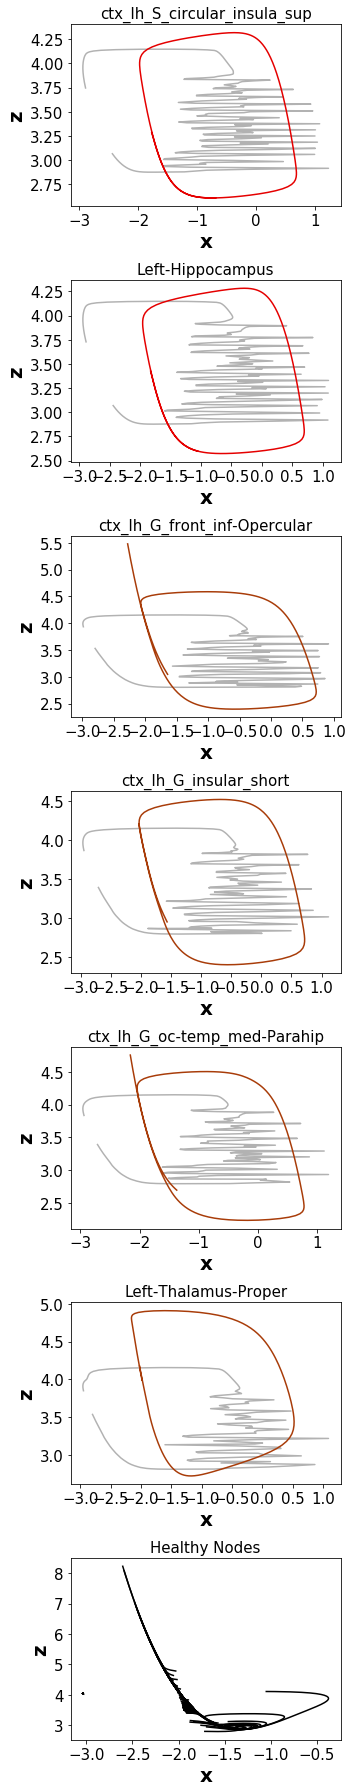

In [5]:
fig = plt.figure(figsize=(5,25))
gs = fig.add_gridspec(1, ez.shape[0])
ez_pz = np.concatenate((ez, pz))
for i, roi in enumerate(ez_pz):
    plt.subplot(ez_pz.shape[0]+1, 1, i+1)
    plt.plot(sim_x[0:-1:5, roi], sim_z[0:-1:5, roi], color='black', alpha=0.3);
    plt.plot(map_x[10:, roi], map_z[10:, roi], color='xkcd:red' if roi in ez else 'xkcd:rust')
    plt.xlabel('x', fontweight='bold', fontsize=20)
    plt.ylabel('z', fontweight='bold', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(roi_names[roi], fontsize=15)
plt.subplot(ez_pz.shape[0]+1, 1,  7)
plt.plot(sim_x[0:-1:5, hz], sim_z[0:-1:5, hz], color='black', alpha=0.3);
plt.plot(map_x[:, hz], map_z[:, hz], color='xkcd:black')
plt.xlabel('x', fontweight='bold', fontsize=20)
plt.ylabel('z', fontweight='bold', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Healthy Nodes', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'predicted_source_crct_implnt_phasespace.svg'))

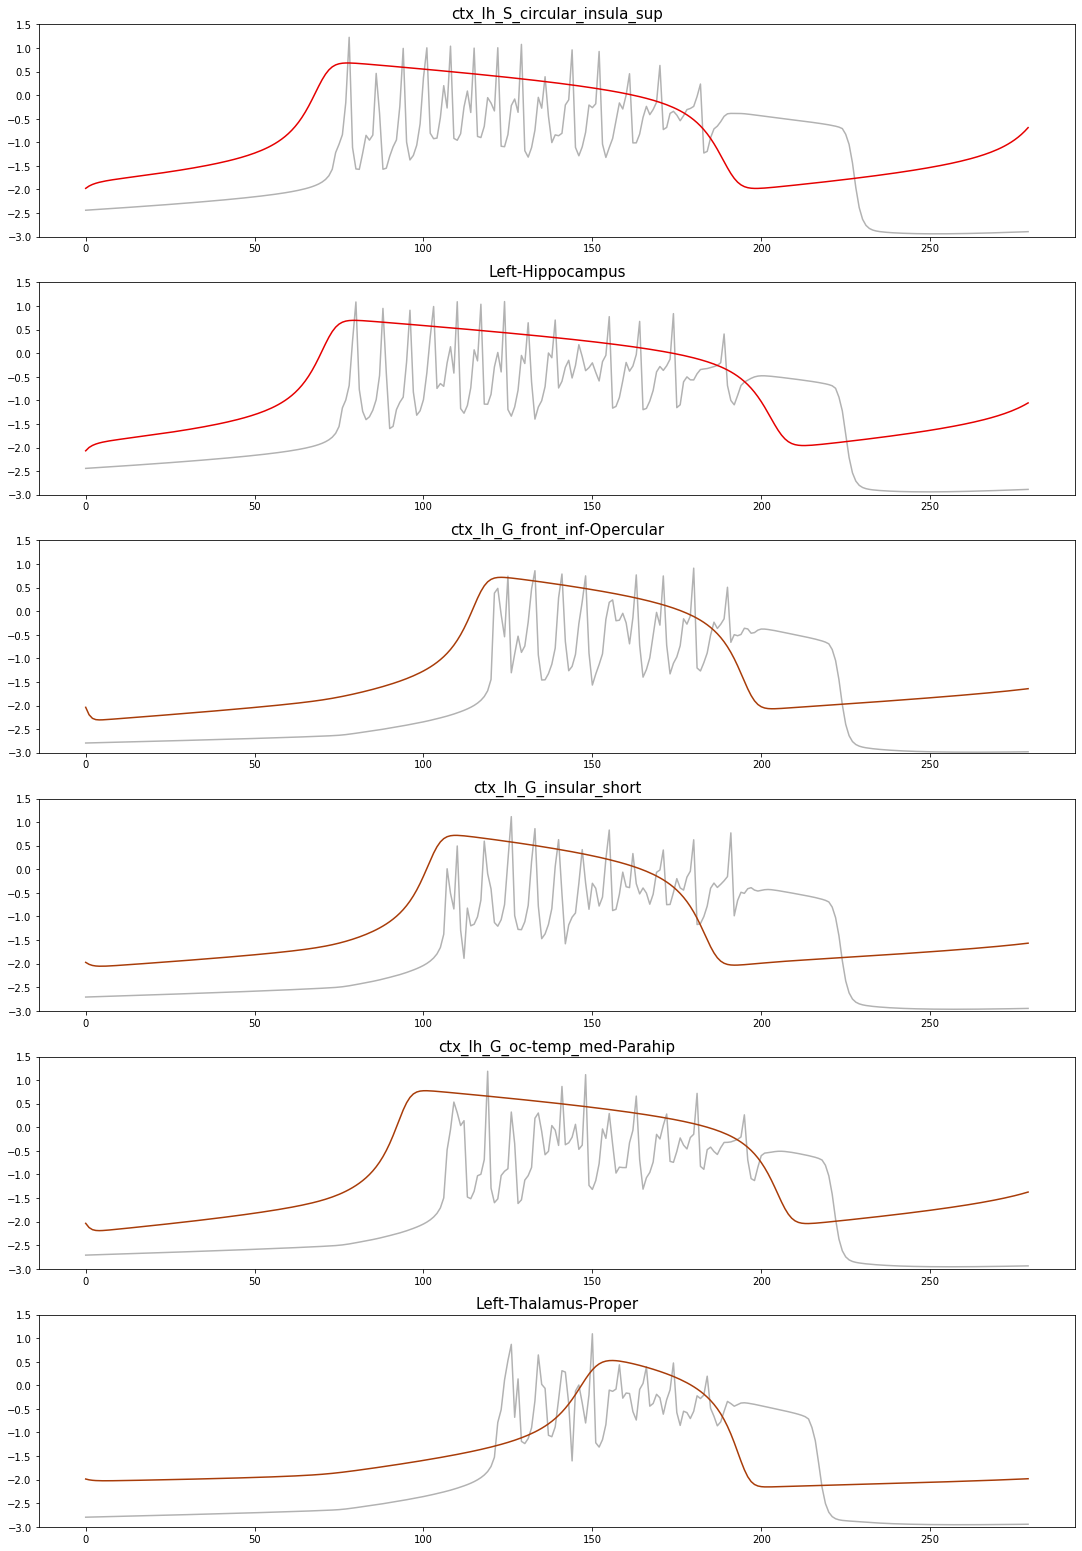

In [5]:
fig = plt.figure(figsize=(15,25))
gs = fig.add_gridspec(7,1)
for i, roi in enumerate(np.concatenate((ez, pz))):
    fig.add_subplot(gs[i, 0])
    plt.plot(sim_x[0:-1:5, roi], 'black', alpha=0.3);
    plt.plot(map_x[:, roi], color='xkcd:red' if roi in ez else 'xkcd:rust');
    plt.ylim(-3, 1.5)
    plt.title(roi_names[roi], fontsize=15)
    
# fig.add_subplot(gs[6,0])
# plt.plot(sim_x[0:-1:5, hz], 'black', alpha=0.3);
# plt.plot(map_x[:, hz], color='xkcd:black');
# plt.title('Healthy Nodes', fontsize=15)
# plt.ylim(-3.2, 1.5)
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'predicted_source_crct_implnt_x.svg'))

#### Onsets

In [1]:
import numpy as np
import lib.io.stan
import lib.plots.stan
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors,cm
from matplotlib.lines import Line2D
import random
import scipy.signal as signal
import os

In [2]:
figs_dir = '/home/anirudh/hdisk/Academia/papers/vep_infer/figures/BT'
sim_data = np.load('datasets/syn_data/id001_bt/syn_tvb_ez=48-79_pz=11-17-22-75.npz')
start_idx = 800
end_idx = 2200
sim_src_sig = sim_data['src_sig'][start_idx:end_idx,0,:,0] + sim_data['src_sig'][start_idx:end_idx,3,:,0]
ds_freq = 5
sim_src_sig_ds = sim_src_sig[0:-1:ds_freq,:]
map_est = lib.io.stan.read_samples(['results/exp10/exp10.69/samples_syn_optim_chain1.csv'])
map_src_sig = map_est['x'][0]

In [3]:
sim_onsets = sim_src_sig_ds.shape[0]*np.zeros(sim_src_sig_ds.shape[1])
for i, sig in enumerate(sim_src_sig_ds.T):
    sig_cond = sig > 0
    if sig_cond.any():
        sim_onsets[i] = np.min(np.nonzero(sig_cond))

map_onsets = np.zeros(map_src_sig.shape[1])
for i, sig in enumerate(map_src_sig.T):
    sig_cond = sig > 0
    if sig_cond.any():
        map_onsets[i] = np.min(np.nonzero(sig_cond))

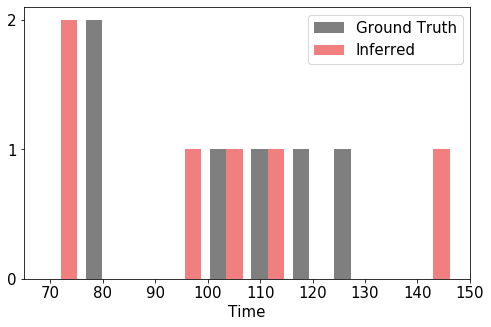

In [6]:
plt.figure(figsize=(8,5))
# plt.bar(np.r_[1:onsets.shape[0]+1], onsets)
# plt.xticks(np.r_[1:onsets.shape[0]+1:2]);
plt.hist([sim_onsets[np.nonzero(sim_onsets > 0)],
         map_onsets[np.nonzero(map_onsets > 0)]],
         color=['black', 'xkcd:red'], alpha=0.5,
         label=['Ground Truth', 'Inferred']);
plt.xlabel('Time', fontsize=15);
plt.xticks(fontsize=15)
plt.yticks(ticks=[0,1,2], labels=[0,1,2], fontsize=15)
plt.legend(fontsize=15)
plt.savefig(os.path.join(figs_dir, 'onsets_crct_implnt.svg'))

## Fit to observation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lib.io.stan
import lib.io.seeg
import os

In [2]:
figs_dir = '/home/anirudh/hdisk/Academia/papers/vep_infer/figures/BT'

map_estim = lib.io.stan.read_samples(['results/exp10/exp10.69/samples_syn_optim_chain1.csv'])
slp_pred = map_estim['mu_slp'][0]
snsr_pwr_pred = map_estim['mu_snsr_pwr'][0]

obs_dat = lib.io.stan.rload('results/exp10/exp10.69/Rfiles/fit_data_snsrfit_ode_syn_optim.R')
slp_obs = obs_dat['slp']
snsr_pwr_obs = obs_dat['snsr_pwr']
nt, ns = slp_pred.shape

chnl_names = [el[0] for el in lib.io.seeg.read_contacts('datasets/syn_data/id001_bt/seeg.xyz', type='list')]

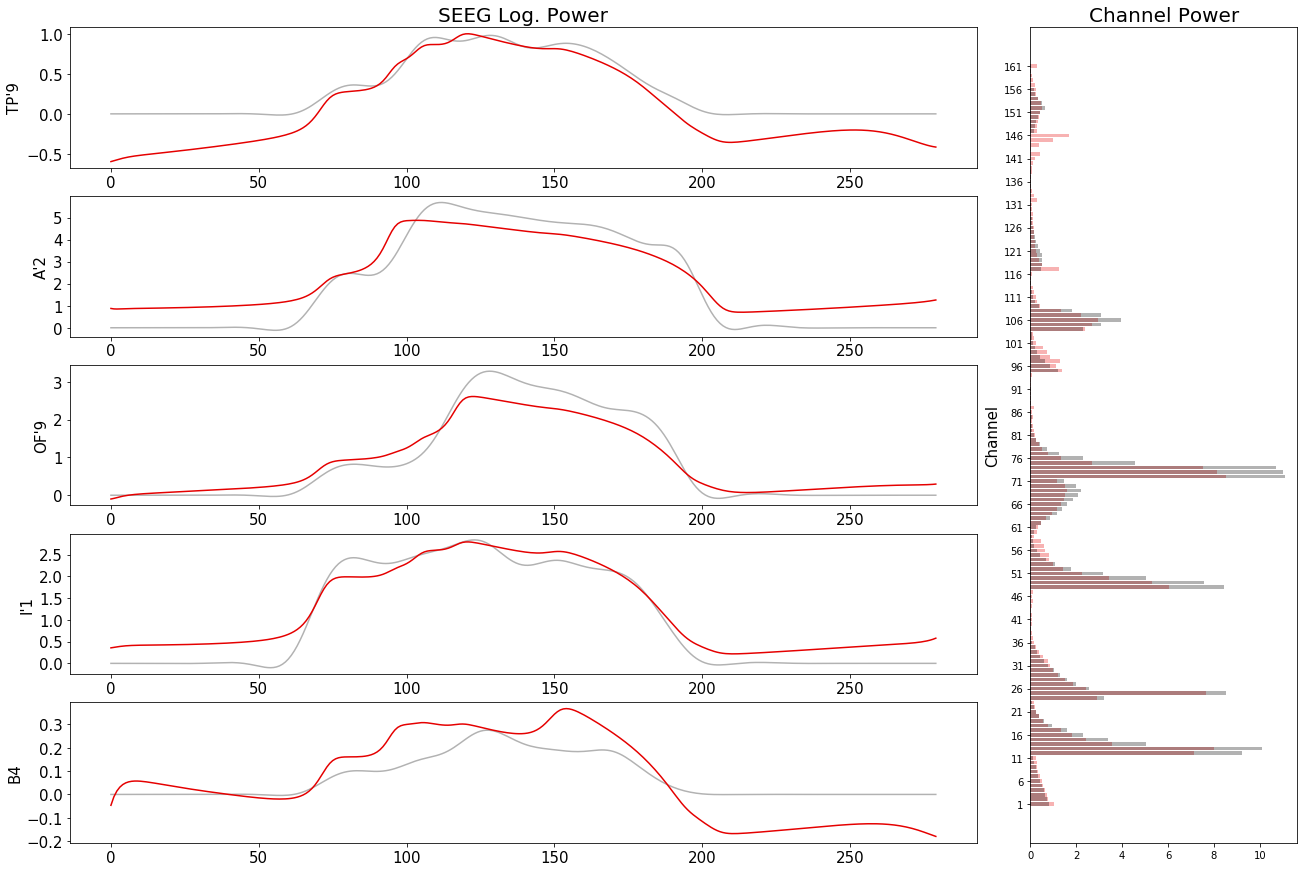

In [3]:
np.random.seed(100)
chnls = np.random.randint(0, ns, 5)
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(5,4)
for i, chnl in enumerate(chnls):
    fig.add_subplot(gs[i, 0:3])
    plt.plot(slp_obs[:, chnl], color='xkcd:black', alpha=0.3)
    plt.plot(slp_pred[:, chnl], color='xkcd:red')
    if(i == 0):
        plt.title('SEEG Log. Power', fontsize=20)
    plt.ylabel(chnl_names[chnl], fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
fig.add_subplot(gs[:,3])
plt.barh(np.r_[1:ns+1], snsr_pwr_pred, color='xkcd:red', alpha=0.3)
plt.barh(np.r_[1:ns+1], snsr_pwr_obs, color='xkcd:black', alpha=0.3)
plt.title('Channel Power', fontsize=20)
plt.ylabel('Channel', fontsize=15)
plt.yticks(np.r_[1:ns+1:5], np.r_[1:ns+1:5]);
plt.savefig(os.path.join(figs_dir, 'fit_to_observations.svg'))

## Slice plots for Retrospective Engel score I

In [1]:
import nibabel
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.utils.stan
import lib.io.tvb
import matplotlib.cm

In [4]:
root_dir = "datasets/retro/id017_mk"

t1 = nibabel.load(os.path.join(root_dir, "mri", "T1.mgz"))
t1_dat = t1.get_data()
lbl = nibabel.load(os.path.join(root_dir, "dwi", "label_in_T1.destrieux.nii.gz"))
lbl_dat = lbl.get_data()

In [5]:
print(t1.affine)
print(lbl.affine)

[[  -1.            0.            0.          128.49972534]
 [   0.            0.            1.         -133.46929932]
 [   0.           -1.            0.          119.81262207]
 [   0.            0.            0.            1.        ]]
[[   1.            0.            0.         -127.50027466]
 [   0.            1.            0.         -133.46929932]
 [   0.            0.            1.         -136.18737793]
 [   0.            0.            0.            1.        ]]


#### Convert Label data FOV into T1's FOV

In [6]:
vox2vox_trnsfrm = np.dot(np.linalg.inv(lbl.affine), t1.affine)
lbl_dat_t1fov = np.zeros_like(lbl_dat)
for c1 in range(t1_dat.shape[0]):
    for r1 in range(t1_dat.shape[1]):
        for s1 in range(t1_dat.shape[2]):
            c2,r2,s2,_ = [int(np.rint(el)) for el in np.dot(vox2vox_trnsfrm, np.array([c1,r1,s1,1]))]
            lbl_dat_t1fov[c1,r1,s1] = lbl_dat[c2-1,r2,s2-1]
np.save(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"), lbl_dat_t1fov)

In [7]:
lbl_dat_t1fov = np.load(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"))

#### Choose colors for EZ

In [8]:
ez_hyp = np.nonzero(np.loadtxt(os.path.join(root_dir, 'tvb', 'ez_hypothesis.destrieux.txt')))[0]
ez_pred, pz_pred = lib.utils.stan.find_ez(0, 10, ['results/exp10/exp10.67/id017_mk/samples_MK_crise1Part1_170328C-BEX_0004_MK_crise1Part2_170328C-BEX_0007_hpf10_lpf0.05_chain1.csv'])
ez_pred = np.nonzero(ez_pred)[0]
pz_pred = np.nonzero(pz_pred)[0]

In [9]:
roi_cntrs, roi_lbls = lib.io.tvb.read_roi_cntrs(os.path.join(root_dir, 'tvb', 'connectivity.destrieux.zip'))
ez_all = np.unique(np.concatenate((ez_hyp, ez_pred)))
cmap_tab10 = matplotlib.cm.get_cmap('tab10').colors
ez_clrs = dict()
for i, roi in enumerate(ez_all):
    ez_clrs[roi_lbls[roi]] = cmap_tab10[i] + (1,)

#### Groud Truth

In [10]:
ez_col_idxs = []
for i,roi in enumerate(ez_hyp):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi, roi_lbls[roi])
    print(ez_col_idxs[i])

ROI:  22 ctx_lh_G_oc-temp_med-Parahip
[113 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152]
ROI:  42 ctx_lh_Pole_temporal
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147]
ROI:  49 ctx_lh_S_collat_transv_ant
[157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178]
ROI:  60 ctx_lh_S_oc-temp_med_and_Lingual
[156 157 158 159 160 161 162 163 164 165 166 167 168]
ROI:  79 Left-Hippocampus
[140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156]
ROI:  80 Left-Amygdala
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162]


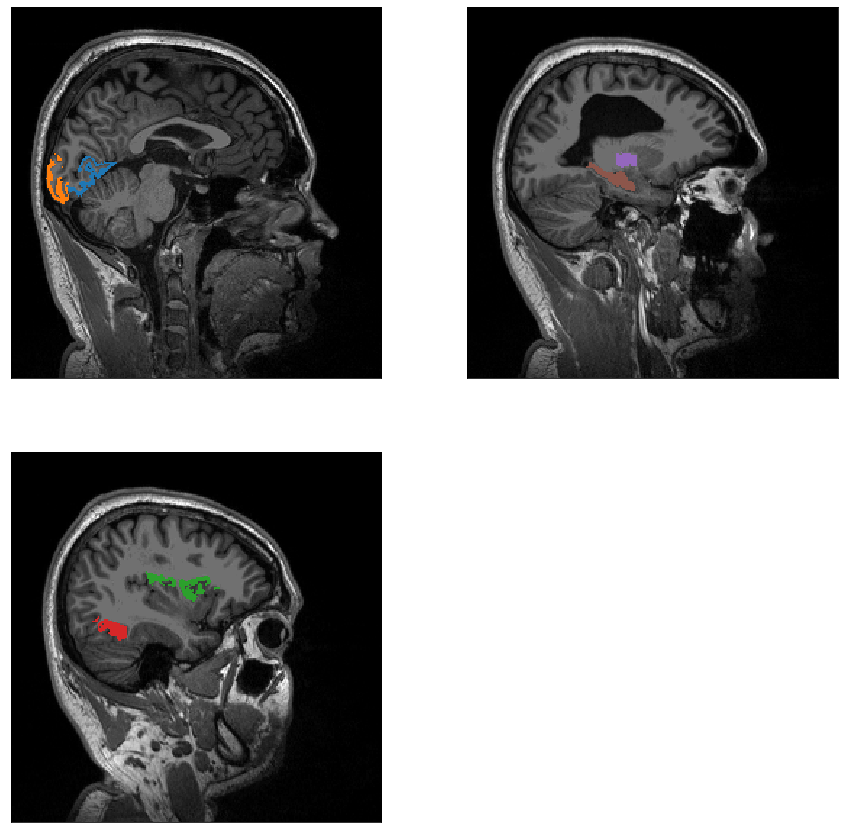

In [19]:
slc_idx = [130, 153, 165]
# fig, axs = plt.subplots(nrows=1, ncols=len(slc_idx), figsize=(20,20), squeeze=True)
plt.figure(figsize=(15,15))
for i, slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_hyp:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]]
    plt.subplot(2,2,i+1)
    plt.imshow(t1_slc, cmap='gray');
    plt.imshow(ol)
    plt.xticks([])
    plt.yticks([])
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel1_ezhyp_id017_mk.png')

#### Predicted EZ

In [20]:
ez_col_idxs = []
for i,roi in enumerate(ez_pred):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi, roi_lbls[roi])
    print(ez_col_idxs[i])

ROI:  22 ctx_lh_G_oc-temp_med-Parahip
[113 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152]
ROI:  42 ctx_lh_Pole_temporal
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147]
ROI:  49 ctx_lh_S_collat_transv_ant
[157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178]
ROI:  60 ctx_lh_S_oc-temp_med_and_Lingual
[156 157 158 159 160 161 162 163 164 165 166 167 168]


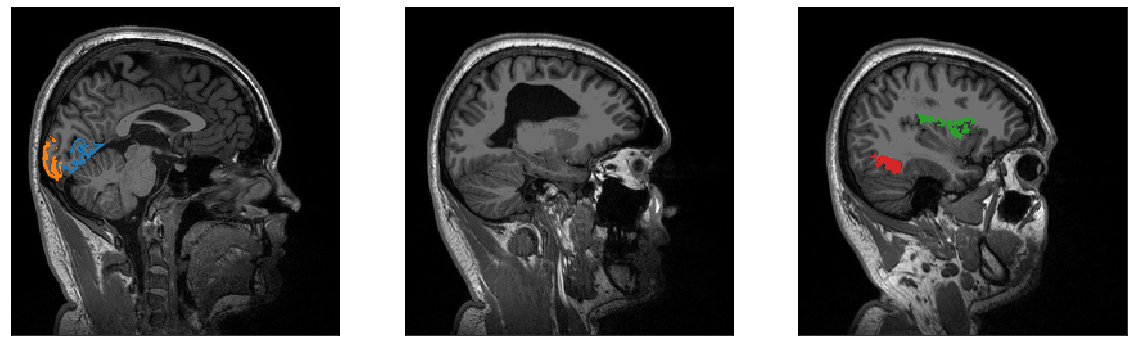

In [21]:
slc_idx = [130, 153, 165]
fig, axs = plt.subplots(nrows=1, ncols=len(slc_idx), figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_pred:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]]
    axs[i].imshow(t1_slc, cmap='gray');
    axs[i].imshow(ol)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
# fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel1_ezpred_id017_mk.png')

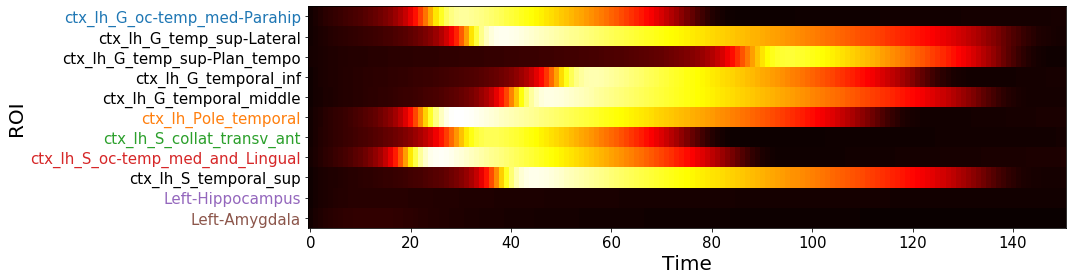

In [22]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id017_mk/samples_MK_crise1Part1_170328C-BEX_0004_MK_crise1Part2_170328C-BEX_0007_hpf10_lpf0.05_chain1.csv'])
x = map_estim['x'][0]

ez_all = np.unique(np.concatenate((ez_hyp, ez_pred)))
x_shfld = np.zeros((ez_all.size+pz_pred.size, x.shape[0]))
ytick_lbls = []
i = 0
for roi in range(x.shape[1]):
    if((roi in ez_all) or (roi in pz_pred)):
        x_shfld[i, :] = x[:, roi]
        ytick_lbls = ytick_lbls + [roi_lbls[roi]]
        i += 1
plt.figure(figsize=(15,4))
plt.imshow(np.exp(x_shfld[0:ez_all.size+pz_pred.size]), cmap='hot', aspect='auto')
plt.yticks(np.r_[0:x_shfld.shape[0]], ytick_lbls, fontsize=15)
plt.xticks(fontsize=15)
for roi in ez_all:
    roi_tick_idx = ytick_lbls.index(roi_lbls[roi])
    plt.gca().get_yticklabels()[roi_tick_idx].set_color(ez_clrs[roi_lbls[roi]])
plt.xlabel('Time', fontsize=20)
plt.ylabel('ROI', fontsize=20)
plt.tight_layout()
# plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel1_src_x_id017_mk.png')

In [23]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id017_mk/samples_MK_crise1Part1_170328C-BEX_0004_MK_crise1Part2_170328C-BEX_0007_hpf10_lpf0.05_chain1.csv'])
x = map_estim['x'][0]
z = map_estim['z'][0]

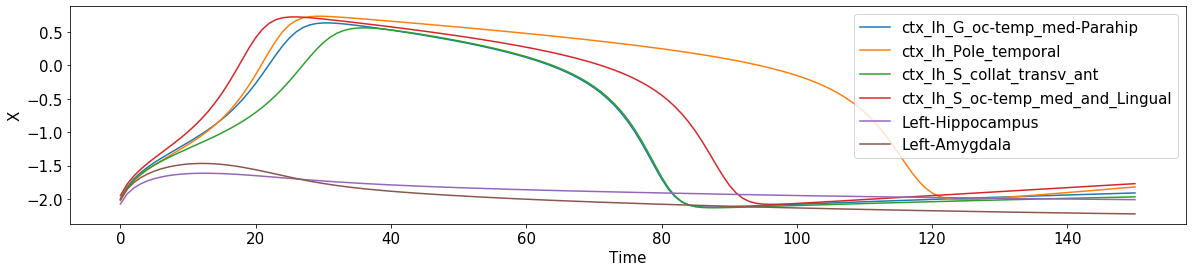

In [24]:
plt.figure(figsize=(20,4))
for roi in ez_hyp:
    plt.plot(x[:, roi], color=ez_clrs[roi_lbls[roi]], label=roi_lbls[roi])
plt.legend(fontsize=15, loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('X', fontsize=15)
plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel1_src_x_2_id017_mk.png')

### Slice plots for Engel score II

In [1]:
import nibabel
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.utils.stan
import lib.io.tvb
import matplotlib.cm

In [2]:
root_dir = "datasets/retro/id001_bt"

t1 = nibabel.load(os.path.join(root_dir, "mri", "T1.mgz"))
t1_dat = t1.get_data()
lbl = nibabel.load(os.path.join(root_dir, "dwi", "label_in_T1.destrieux.nii.gz"))
lbl_dat = lbl.get_data()

In [3]:
print(t1.affine)
print(lbl.affine)

[[-1.00000000e+00  0.00000000e+00  0.00000000e+00  1.29443634e+02]
 [ 0.00000000e+00  9.31322575e-10  1.00000000e+00 -1.33255569e+02]
 [ 7.45058060e-09 -1.00000012e+00 -4.65661287e-10  7.66060791e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -1.26556366e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.33255554e+02]
 [-3.23117388e-27  0.00000000e+00  1.00000000e+00 -1.79393951e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


#### Convert Label data FOV into T1's FOV

In [4]:
vox2vox_trnsfrm = np.dot(np.linalg.inv(lbl.affine), t1.affine)
lbl_dat_t1fov = np.zeros_like(lbl_dat)
for c1 in range(t1_dat.shape[0]):
    for r1 in range(t1_dat.shape[1]):
        for s1 in range(t1_dat.shape[2]):
            c2,r2,s2,_ = [int(np.rint(el)) for el in np.dot(vox2vox_trnsfrm, np.array([c1,r1,s1,1]))]
            lbl_dat_t1fov[c1,r1,s1] = lbl_dat[c2-1,r2,s2-1]
np.save(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"), lbl_dat_t1fov)

In [4]:
lbl_dat_t1fov = np.load(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"))

#### Groud Truth

In [5]:
ez_hyp = np.nonzero(np.loadtxt(os.path.join(root_dir, 'tvb', 'ez_hypothesis.destrieux.txt')))[0]
roi_cntrs, roi_lbls = lib.io.tvb.read_roi_cntrs(os.path.join(root_dir, 'tvb', 'connectivity.destrieux.zip'))
ez_col_idxs = []
for i,roi in enumerate(ez_hyp):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi, roi_lbls[roi])
    print(ez_col_idxs[i])

ROI:  86 Right-Hippocampus
[103 104 105 106 107 108 109 110 111 112 113 114 115 116]
ROI:  87 Right-Amygdala
[ 97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122]


#### Choose colors for roi in EZ hypothesis

In [6]:
cmap_tab10 = matplotlib.cm.get_cmap('tab10').colors
ez_clrs = dict()
ez_clrs[roi_lbls[86]] = cmap_tab10[0]
ez_clrs[roi_lbls[87]] = cmap_tab10[1]

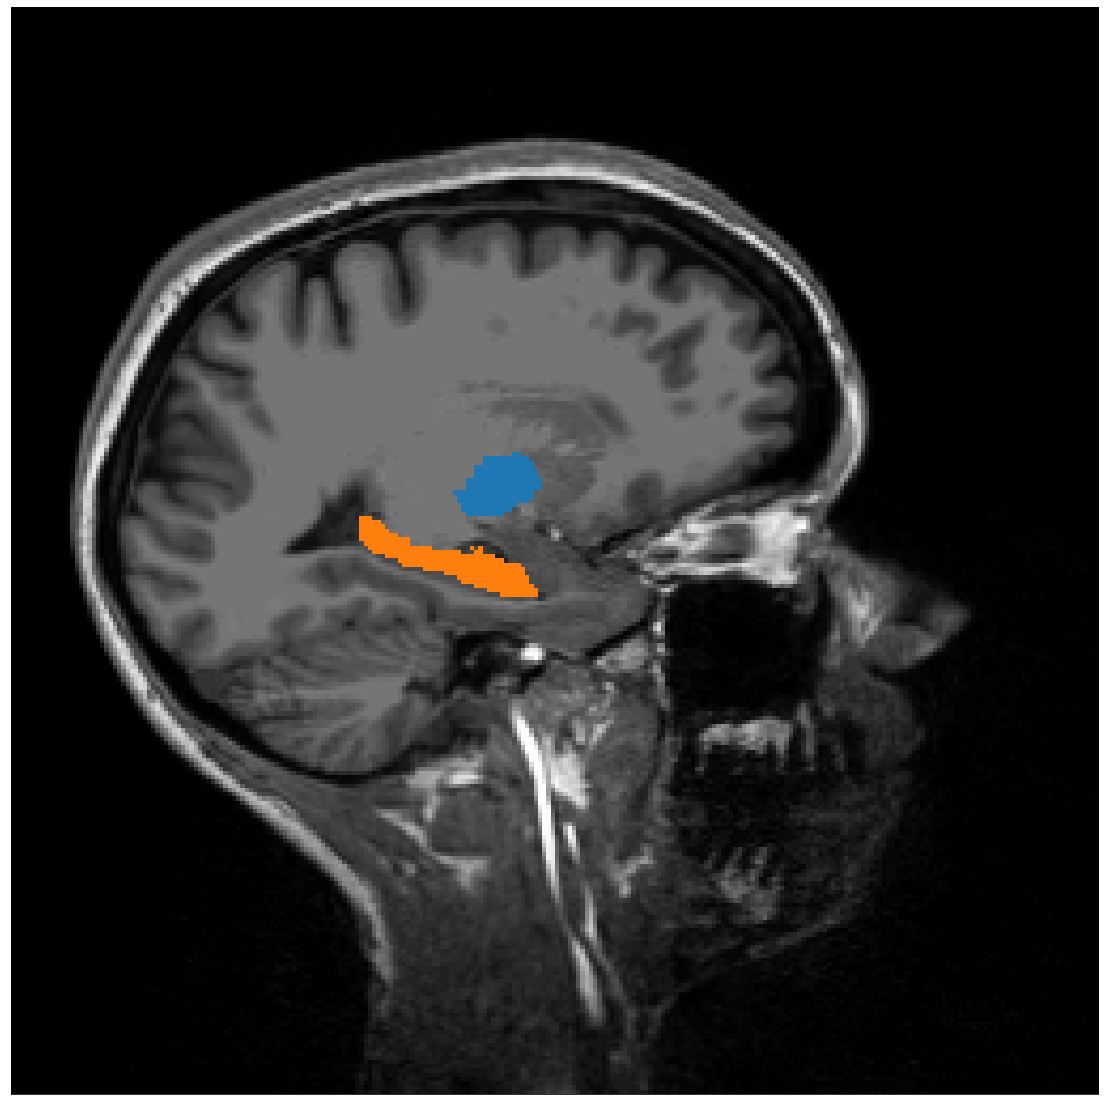

In [7]:
slc_idx = [108]
fig, axs = plt.subplots(nrows=1, ncols=len(slc_idx), figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_hyp:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]] + (1,)
    axs.imshow(t1_slc, cmap='gray');
    axs.imshow(ol)
    axs.set_xticks([])
    axs.set_yticks([])
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel2_ezhyp.png')

#### Predicted EZ

In [8]:
ez_pred, pz_pred = lib.utils.stan.find_ez(0, 10, ['results/exp10/exp10.67/id001_bt/samples_BTcrise1appportable_0006_hpf10_lpf0.02_chain1.csv'])
ez_pred = np.nonzero(ez_pred)[0]
pz_pred = np.nonzero(pz_pred)[0]
ez_col_idxs = []
print('EZ')
for i,roi in enumerate(ez_pred):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi, roi_lbls[roi])
    print(ez_col_idxs[i])
print('PZ')
pz_col_idxs = []
for i,roi in enumerate(pz_pred):
    pz_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi)
    print(pz_col_idxs[i])

EZ
ROI:  14 ctx_lh_G_front_middle
[154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175]
ROI:  72 ctx_lh_S_temporal_sup
[166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190]
ROI:  86 Right-Hippocampus
[103 104 105 106 107 108 109 110 111 112 113 114 115 116]
ROI:  87 Right-Amygdala
[ 97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122]
ROI:  142 ctx_rh_S_front_sup
[ 76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102]
PZ
ROI:  3
[124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146]
ROI:  25
[151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185]
ROI:  33
[159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180]
ROI:  35
[147 148 149 150 1

#### Choose colors predicted EZ

In [9]:
ez_clrs[roi_lbls[14]] = cmap_tab10[2]
ez_clrs[roi_lbls[72]] = cmap_tab10[3]
ez_clrs[roi_lbls[142]] = cmap_tab10[4]

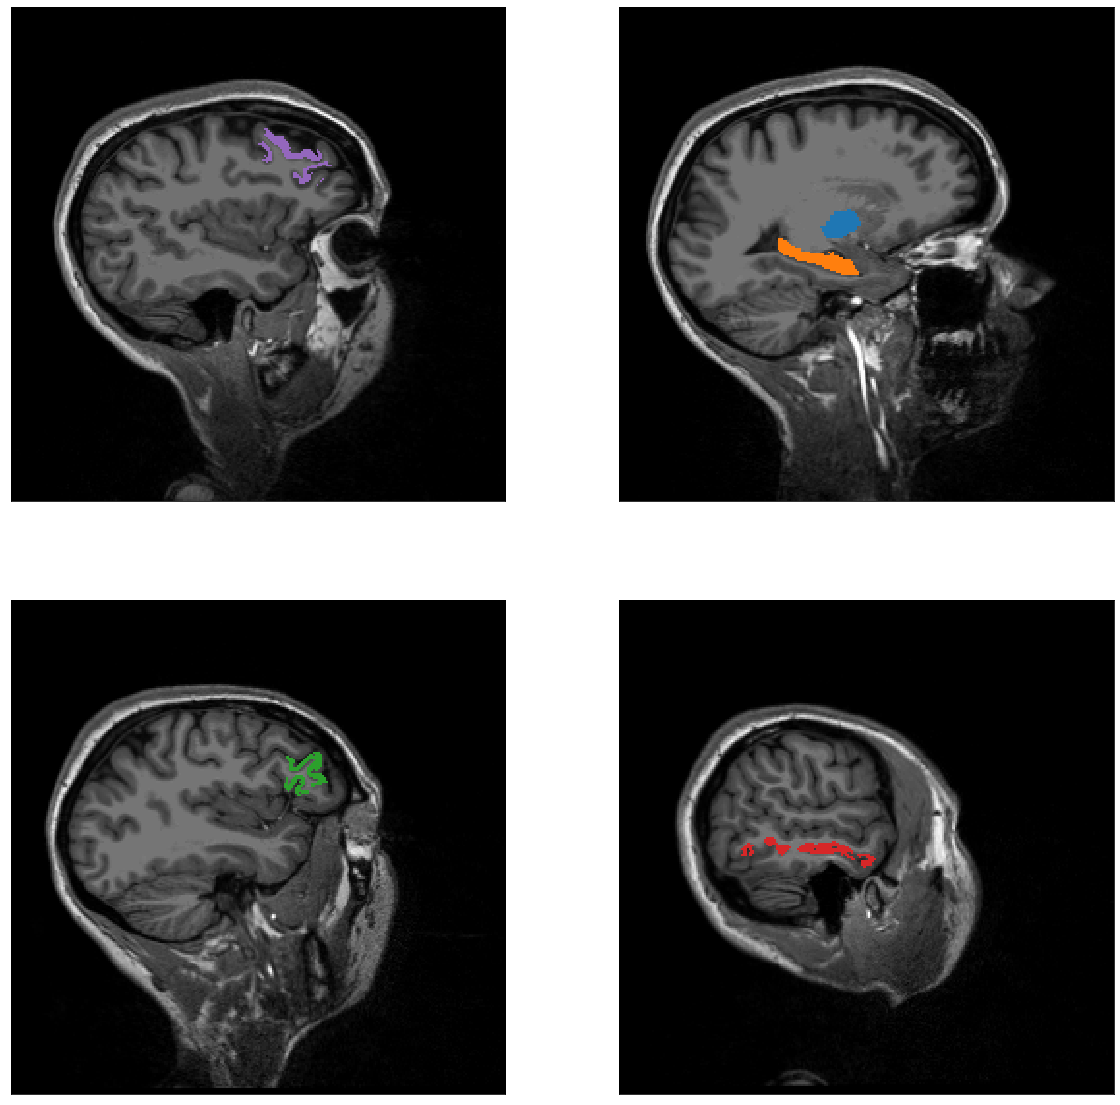

In [15]:
slc_idx = [92, 108, 165, 180]
fig = plt.figure(figsize=(20,20))
# gs = fig.add_gridspec(2,2)
# fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_pred:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]] + (1,)
    plt.subplot(2,2,i+1)
#     axs = fig.add_subplot(gs[i, i])
    plt.imshow(t1_slc, cmap='gray');
    plt.imshow(ol)
    plt.xticks([])
    plt.yticks([])
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel2_ezpred.png')

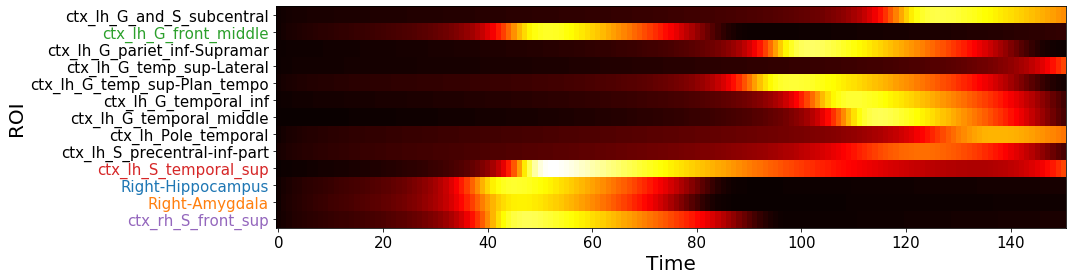

In [11]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id001_bt/samples_BTcrise1appportable_0006_hpf10_lpf0.02_chain1.csv'])
x = map_estim['x'][0]

ez_all = np.unique(np.concatenate((ez_hyp, ez_pred)))
x_shfld = np.zeros((ez_all.size+pz_pred.size, x.shape[0]))
ytick_lbls = []
i = 0
for roi in range(x.shape[1]):
    if((roi in ez_all) or (roi in pz_pred)):
        x_shfld[i, :] = x[:, roi]
        ytick_lbls = ytick_lbls + [roi_lbls[roi]]
        i += 1
plt.figure(figsize=(15,4))
plt.imshow(np.exp(x_shfld[0:ez_all.size+pz_pred.size]), cmap='hot', aspect='auto')
plt.yticks(np.r_[0:x_shfld.shape[0]], ytick_lbls, fontsize=15)
plt.xticks(fontsize=15)
for roi in ez_all:
    roi_tick_idx = ytick_lbls.index(roi_lbls[roi])
    plt.gca().get_yticklabels()[roi_tick_idx].set_color(ez_clrs[roi_lbls[roi]])
plt.xlabel('Time', fontsize=20)
plt.ylabel('ROI', fontsize=20)
plt.tight_layout()
plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel2_src_x.png')

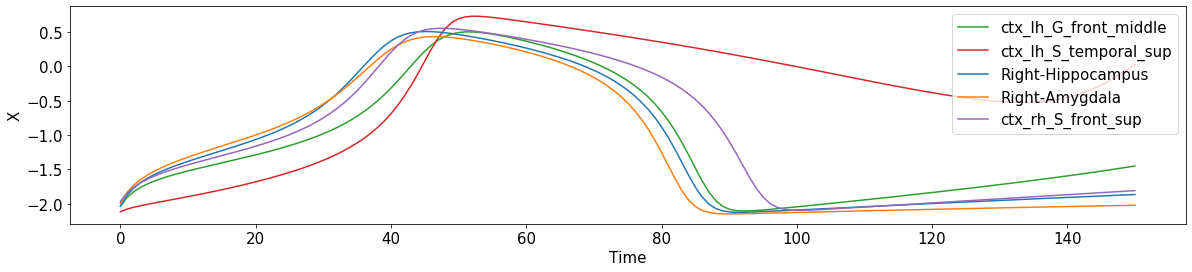

In [12]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id001_bt/samples_BTcrise1appportable_0006_hpf10_lpf0.02_chain1.csv'])
x = map_estim['x'][0]

plt.figure(figsize=(20,4))
for roi in ez_pred:
    plt.plot(x[:, roi], color=ez_clrs[roi_lbls[roi]], label=roi_lbls[roi])
plt.legend(fontsize=15, loc='upper right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('X', fontsize=15)
plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel2_src_x_2.png')

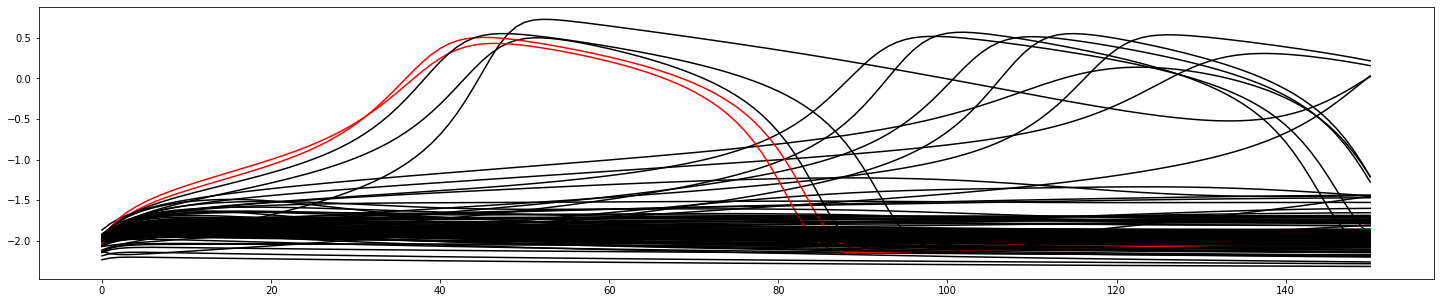

In [13]:
import lib.io.stan
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id001_bt/samples_BTcrise1appportable_0006_hpf10_lpf0.02_chain1.csv'])
x = map_estim['x'][0].T
ez_hyp = np.nonzero(np.loadtxt('datasets/retro/id001_bt/tvb/ez_hypothesis.destrieux.txt'))[0]
plt.figure(figsize=(25,5))
for i, x_ in enumerate(x):
    if(i in ez_hyp):
        plt.plot(x_, 'r')
    else:
        plt.plot(x_, 'k')

### Slice plots for Engel score III

In [1]:
import nibabel
import numpy as np
import matplotlib.pyplot as plt
import os
import lib.utils.stan
import matplotlib.cm
import lib.io.tvb

In [2]:
root_dir = "datasets/retro/id028_ca"

t1 = nibabel.load(os.path.join(root_dir, "mri", "T1.mgz"))
t1_dat = t1.get_data()
lbl = nibabel.load(os.path.join(root_dir, "dwi", "label_in_T1.destrieux.nii.gz"))
lbl_dat = lbl.get_data()

In [3]:
print(t1.affine)
print(lbl.affine)

[[-1.00000012e+00  0.00000000e+00 -7.45058060e-09  1.34026642e+02]
 [-7.45058060e-09 -4.65661287e-10  1.00000012e+00 -1.46725571e+02]
 [ 0.00000000e+00 -1.00000012e+00  1.86264515e-09  1.25564232e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[   1.            0.            0.         -121.97338867]
 [   0.            1.            0.         -146.72555542]
 [   0.            0.            1.         -130.43579102]
 [   0.            0.            0.            1.        ]]


#### Convert Label data FOV into T1's FOV

In [4]:
vox2vox_trnsfrm = np.dot(np.linalg.inv(lbl.affine), t1.affine)
lbl_dat_t1fov = np.zeros_like(lbl_dat)
for c1 in range(t1_dat.shape[0]):
    for r1 in range(t1_dat.shape[1]):
        for s1 in range(t1_dat.shape[2]):
            c2,r2,s2,_ = [int(np.rint(el)) for el in np.dot(vox2vox_trnsfrm, np.array([c1,r1,s1,1]))]
            lbl_dat_t1fov[c1,r1,s1] = lbl_dat[c2-1,r2,s2-1]
np.save(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"), lbl_dat_t1fov)

In [4]:
lbl_dat_t1fov = np.load(os.path.join(root_dir, "dwi", "label_in_T1fov.destrieux.npy"))

#### Groud Truth

In [5]:
ez_hyp = np.nonzero(np.loadtxt(os.path.join(root_dir, 'tvb', 'ez_hypothesis.destrieux.txt')))[0]
roi_cntrs, roi_lbls = lib.io.tvb.read_roi_cntrs(os.path.join(root_dir, 'tvb', 'connectivity.destrieux.zip'))
ez_col_idxs = []
for i,roi in enumerate(ez_hyp):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi)
    print(ez_col_idxs[i])

ROI:  112
[ 86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115]
ROI:  131
[ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 120]
ROI:  135
[117 118 119 120 121 122 123 124 125 126 127 128 129 130 131]
ROI:  151
[ 91  92  93  94  95  96  97  98  99 100 101 102 103 104]
ROI:  152
[112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130]


#### Choose colors for roi in EZ hypothesis

In [6]:
cmap_tab10 = matplotlib.cm.get_cmap('tab10').colors
ez_clrs = dict()
ez_clrs[roi_lbls[112]] = cmap_tab10[0]
ez_clrs[roi_lbls[131]] = cmap_tab10[1]
ez_clrs[roi_lbls[135]] = cmap_tab10[2]
ez_clrs[roi_lbls[151]] = cmap_tab10[3]
ez_clrs[roi_lbls[152]] = cmap_tab10[4]

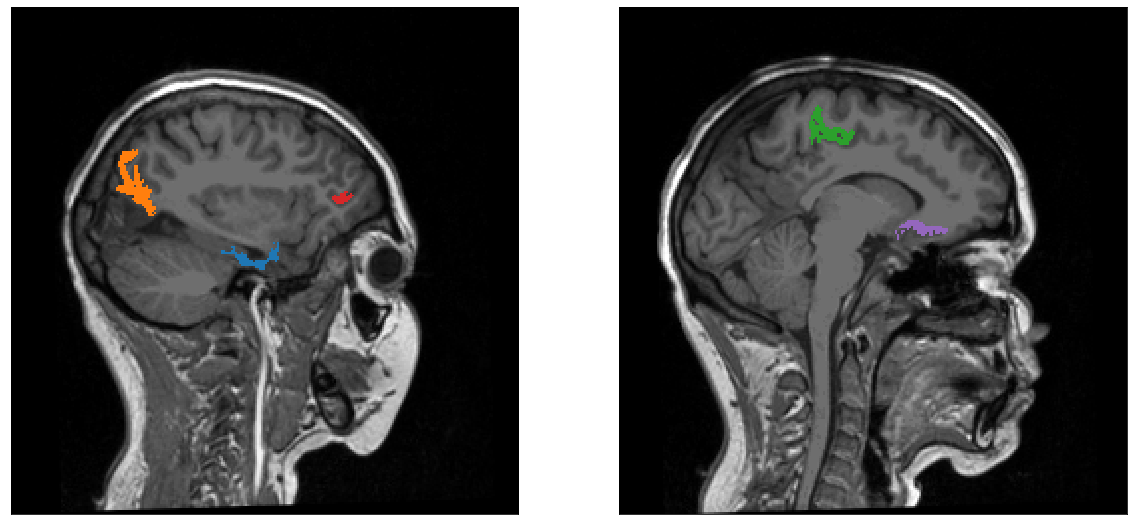

In [7]:
slc_idx = [102, 123]
fig, axs = plt.subplots(nrows=1, ncols=len(slc_idx), figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_hyp:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]] + (1,)
    axs[i].imshow(t1_slc, cmap='gray');
    axs[i].imshow(ol)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel3_ezhyp.png')

#### Predicted EZ

In [8]:
ez_pred, pz_pred = lib.utils.stan.find_ez(0, 10, ['results/exp10/exp10.67/id028_ca/samples_CA_crise1P_091126B-BEX_0002_hpf10_lpf0.05_chain1.csv'])
ez_pred = np.nonzero(ez_pred)[0]
pz_pred = np.nonzero(pz_pred)[0]
ez_col_idxs = []
print('EZ')
for i,roi in enumerate(ez_pred):
    ez_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi)
    print(ez_col_idxs[i])
print('PZ')
pz_col_idxs = []
for i,roi in enumerate(pz_pred):
    pz_col_idxs.append(np.unique(np.nonzero(lbl_dat_t1fov == roi)[0]))
    print('ROI: ', roi)
    print(pz_col_idxs[i])

EZ
ROI:  23
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161]
PZ
ROI:  14
[164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186]
ROI:  15
[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183]
ROI:  52
[159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182]
ROI:  63
[139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154]
ROI:  77
[136 137 138 139 140 141 142 143 144 145 146 147 148 149 150]
ROI:  112
[ 86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115]
ROI:  151
[ 91  92  93  94  95  96  97  98  99 100 101 102 103 104]


#### Choose colors for roi in EZ Predictions

In [9]:
ez_clrs[roi_lbls[23]] = cmap_tab10[6]

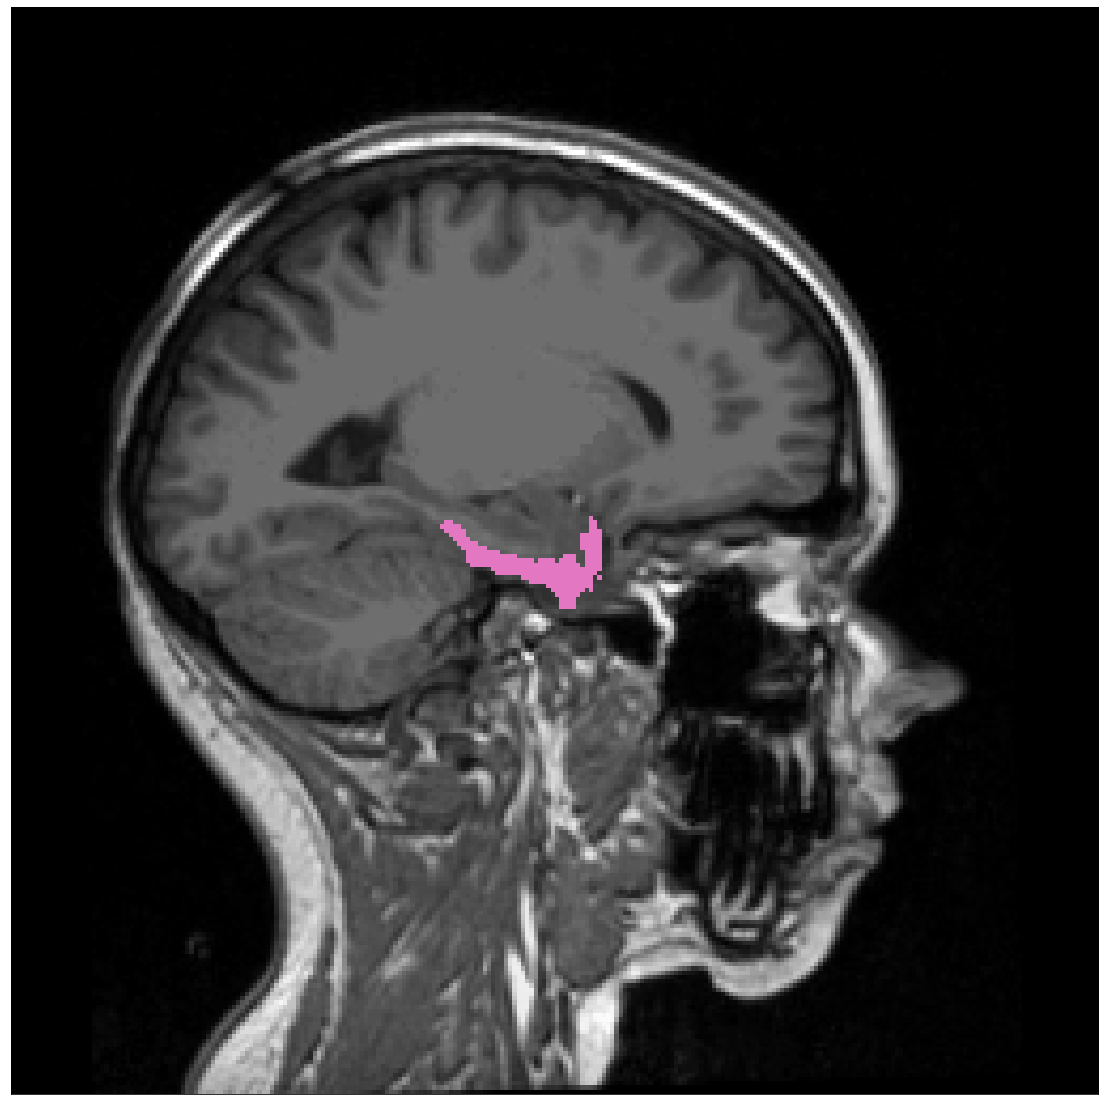

In [10]:
slc_idx = [150]
fig, axs = plt.subplots(nrows=1, ncols=len(slc_idx), figsize=(20,20), squeeze=True)
for i,slc_idx_ in enumerate(slc_idx):
    t1_slc = t1_dat[slc_idx_, :, :]
    lbl_slc = lbl_dat_t1fov[slc_idx_, :, :]
    ol = np.zeros(lbl_slc.shape + (4,))
    for roi in ez_pred:
        ol[lbl_slc == roi] = ez_clrs[roi_lbls[roi]] + (1,)
    axs.imshow(t1_slc, cmap='gray');
    axs.imshow(ol)
    axs.set_xticks([])
    axs.set_yticks([])
fig.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel3_ezpred.png')

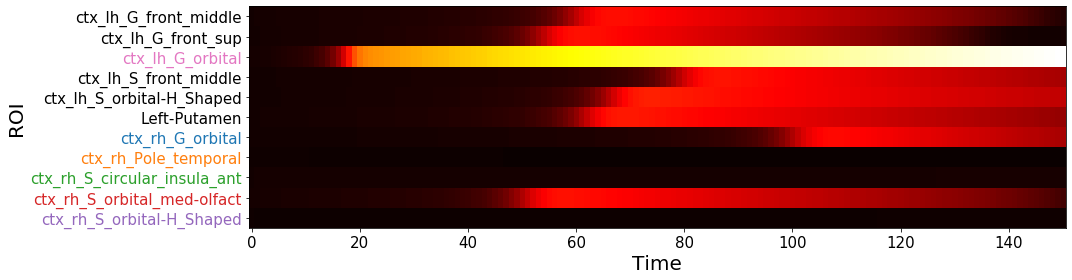

In [11]:
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id028_ca/samples_CA_crise1P_091126B-BEX_0002_hpf10_lpf0.05_chain1.csv'])
x = map_estim['x'][0]

ez_all = np.unique(np.concatenate((ez_hyp, ez_pred)))
pz_pred_2 = np.setdiff1d(pz_pred, ez_hyp) # removing roi's in ezhyp from pz_pred as they are already included in ez_all
x_shfld = np.zeros((ez_all.size+pz_pred_2.size, x.shape[0]))
ytick_lbls = []
i = 0
for roi in range(x.shape[1]):
    if((roi in ez_all) or (roi in pz_pred_2)):
        x_shfld[i, :] = x[:, roi]
        ytick_lbls = ytick_lbls + [roi_lbls[roi]]
        i += 1
plt.figure(figsize=(15,4))
plt.imshow(np.exp(x_shfld), cmap='hot', aspect='auto')
plt.yticks(np.r_[0:x_shfld.shape[0]], ytick_lbls, fontsize=15)
plt.xticks(fontsize=15)
for roi in ez_all:
    roi_tick_idx = ytick_lbls.index(roi_lbls[roi])
    plt.gca().get_yticklabels()[roi_tick_idx].set_color(ez_clrs[roi_lbls[roi]])
plt.xlabel('Time', fontsize=20)
plt.ylabel('ROI', fontsize=20)
plt.tight_layout()
plt.savefig('/home/anirudh/hdisk/Academia/papers/vep_infer/figures/Retro/retro_engel3_src_x.png')

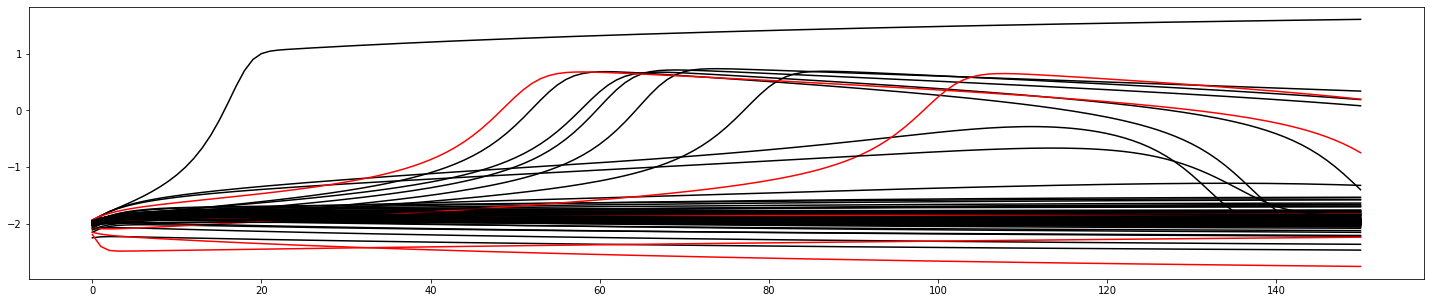

In [29]:
import lib.io.stan
map_estim = lib.io.stan.read_samples(['results/exp10/exp10.67/id028_ca/samples_CA_crise1P_091126B-BEX_0002_hpf10_lpf0.05_chain1.csv'])
x = map_estim['x'][0].T
ez_hyp = np.nonzero(np.loadtxt('datasets/retro/id028_ca/tvb/ez_hypothesis.destrieux.txt'))[0]
plt.figure(figsize=(25,5))
for i, x_ in enumerate(x):
    if(i in ez_hyp):
        plt.plot(x_, 'r')
    else:
        plt.plot(x_, 'k')